# Titanic

#### Objective:
- Predict survival on the Titanic

#### Model:
- Logistic Regression

### Importation of necessary packages

In [799]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pylab as plot

## Lecture of the dataset and preprocessing

- Load the dataset

In [800]:
# path to dataset
# CHANGE AS NEEDED
df=pd.read_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\Titanic\train.csv')

- Size and first lines of the dataframe:

In [801]:
print("Size of the dataset :",df.shape)
df.head()

Size of the dataset : (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- The two first columns look similar, check and delete one.

In [802]:
if np.array_equal(df.index.tolist(),np.array(df["PassengerId"].tolist())-1):
    del df["PassengerId"]

- Types of features and change int to floats

In [803]:
print("Number of continuous features : " , df.dtypes.astype(str).value_counts()[2],", of int features : " , df.dtypes.astype(str).value_counts()[1],", of categorical features : " , df.dtypes.astype(str).value_counts()[0] , "\n")
for x in df.columns:
    if(df[x].dtype==np.int64):
        df[x]=df[x].astype(float)

Number of continuous features :  2 , of int features :  4 , of categorical features :  5 



- Check is the categorical features look badly filled

In [804]:
for x in df.columns:
    if(df[x].dtype==np.object):
        print("Values of feature", x, ":",df[x].unique())

Values of feature Name : ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss

- Mean normalisation for continuous and int features

In [805]:
dictMeanStd={}
for x in df.columns:
    if df[x].dtype!=np.object and x!='Survived':
        dictMeanStd[x]=[df[x].mean(),df[x].std()]
        df[x]=(df[x]-dictMeanStd[x][0])/dictMeanStd[x][1]

- Count the number of survivors

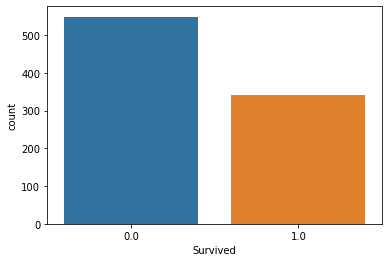

In [806]:
sns.countplot('Survived',data=df)

- Some description of the numerical features

In [807]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,8.910000e+02,7.140000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,1.679664e-16,2.003921e-16,1.528893e-16,-3.638441e-17,7.437622e-16
std,0.486592,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.565228e+00,-2.015566e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,0.000000,-3.691575e-01,-6.590796e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,0.000000,8.269128e-01,-1.169668e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,1.000000,8.269128e-01,5.714304e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,1.000000,8.269128e-01,3.462699e+00,6.780355e+00,6.970233e+00,9.661740e+00


- The maximum value of Fare looks strange compared to the mean, lets look deeper at this

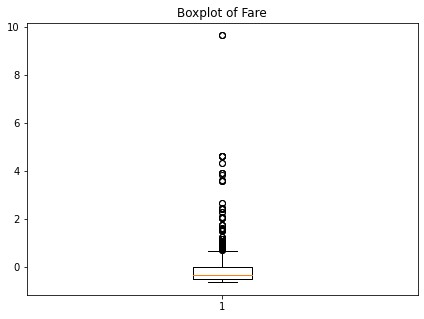

In [808]:
plt.subplots(figsize=(7, 5))
plt.boxplot(df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

- Print the tickets with Fare higher than 300

In [809]:
df[df['Fare']>300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


- They share the same ticket, can we divide by 3 the Fare value?

In [810]:
# df[df['Fare']>300]
# df['Fare'].loc[[258,679,737]]=df[df['Fare']>300]['Fare']/3

- Lets look at ratio of survivors based on sex

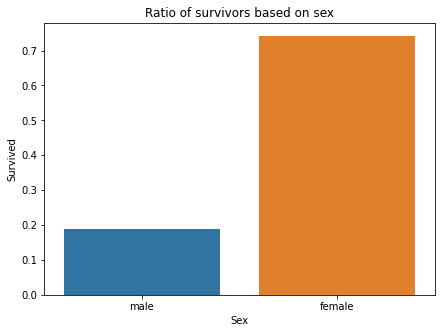

In [811]:
plt.subplots(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Ratio of survivors based on sex')
plt.show()

- Lets look at ratio of survivors based on pclass (class of the ticket)

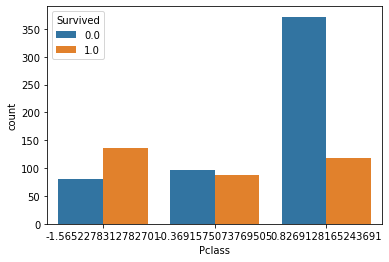

In [812]:
sns.countplot('Pclass',hue='Survived',data=df)

### Feature engineering

- Add new feature Title extracted from the feature Name and check the values

In [813]:
df['Title']=''
for i in range(len(df['Name'].values)):
    j=0
    while j<len(df['Name'][i]) and df['Name'][i][j]!=',':
        j+=1
    temp=''
    j+=2
    while j<len(df['Name'][i]) and df['Name'][i][j]!='.':
        temp+=df['Name'][i][j]
        j+=1
    df['Title'][i]=temp
    
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


- Lets group together some titles

In [814]:
def map_title(df):
    title_category = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
    }
    new_title = df['Title'].map(title_category)
    return new_title
df['Title']=map_title(df)

- Lets look at ratio of survivors based on titles

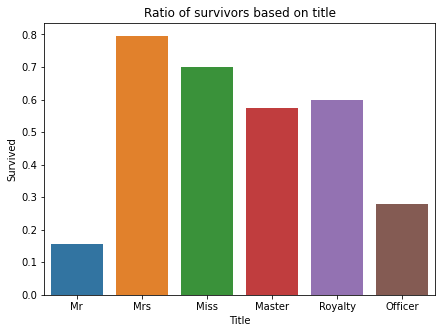

In [815]:
plt.subplots(figsize=(7, 5))
sns.barplot(x='Title', y='Survived', data=df, ci=None)
plt.title('Ratio of survivors based on title')
plt.show()

- Delete features that dont look useful for the prediction

In [816]:
del df['Name']
del df['Ticket']

### Missing values

- Heatmap of missing values

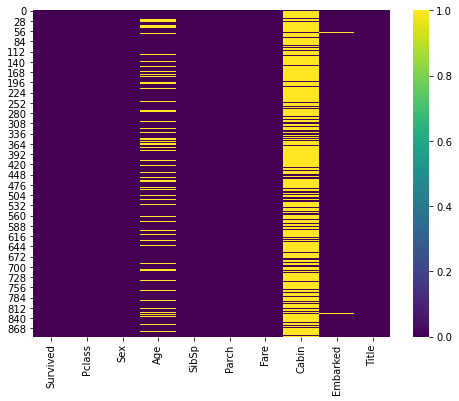

In [817]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='viridis')

- Fill of the feature Age using means over Title

In [818]:
age_ref = pd.DataFrame(data=[df.groupby('Title')['Age'].mean()],columns=df['Title'].unique())

def fill_age(title,age):
    if pd.isnull(age):
        return float(age_ref[title])
    else:
        return age

df['Age'] = df.apply(lambda x: fill_age(x['Title'],x['Age']), axis=1)

- Handle the rest of the missing values.

In [819]:
print(df.isnull().sum().sort_values())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Embarked      2
Cabin       687
dtype: int64


In [820]:
# Fill missing values in the feature Embarked by the most common value
EmbardedMode=df['Embarked'].mode()[0]
df['Embarked'].fillna(EmbardedMode, inplace=True)

# Create new category Unknown for missing values in the other categorical features:
for x in df.columns:
    if(df[x].dtype==np.object):
        df[x] = np.where(df[x].isnull(),"Unknown",df[x])

# Put 0 where values are missing for cont and int features
df=df.replace(np.nan,0)

### Detection of outliers

In [821]:
"""
threshold=5
df['outliers']=0
for x in df.columns:
    if(df[x].dtype!=np.object and x!='outliers' and x!='Survived'):
        df.loc[(df[x]-df[x].mean()).abs() > threshold*df[x].std(),'outliers'] = 1

print("The number of outliers is",sum(df['outliers']))
df=df[df.outliers==0].reset_index(drop=True)
y=df['Survived'].values
del df['outliers']"""

'\nthreshold=5\ndf[\'outliers\']=0\nfor x in df.columns:\n    if(df[x].dtype!=np.object and x!=\'outliers\' and x!=\'Survived\'):\n        df.loc[(df[x]-df[x].mean()).abs() > threshold*df[x].std(),\'outliers\'] = 1\n\nprint("The number of outliers is",sum(df[\'outliers\']))\ndf=df[df.outliers==0].reset_index(drop=True)\ny=df[\'Survived\'].values\ndel df[\'outliers\']'

### Separation of X and y

In [822]:
y=df["Survived"].values
df=df.loc[:, df.columns != "Survived"]

### Handling of categorical features

- One Hot Encoding on categorical features (nominal)

In [823]:
# Separate cat and float features to do a onehotencoding on cat features
dftemp=df.select_dtypes('object')
enc=OneHotEncoder(handle_unknown = 'ignore')
enc.fit(dftemp)
dftemp=enc.transform(dftemp).toarray()
df=np.concatenate([dftemp,df.select_dtypes('float64').values],axis=1)

### Creation of artificial values using SMOTE

In [824]:
oversample = SMOTE()
df, y = oversample.fit_resample(df, y)

### Model

In [825]:
# Choice of the model
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

- Cross-validation 

In [826]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


#grid={"penalty":['l1', 'l2'], "C":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],"class_weight":['balanced'],"solver":['liblinear', 'saga']}

grid={"penalty":['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],"class_weight":['balanced']}

#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
regressor=LogisticRegression(max_iter=100000)
regressor_cv=GridSearchCV(regressor,grid,cv=5,scoring="accuracy")

- Fit of the model

In [827]:
# Model
regressor.fit(df, y)

LogisticRegression(max_iter=100000)

- Prediction and accuracy of the model on train set

In [828]:
y_pred=regressor.predict(df)
print("Accuracy on the train:", accuracy_score(y_pred,y))

Accuracy on the train: 0.8597449908925319


# Submission part

In [829]:
# Import the submission file
# CHANGE AS NEEDED
sub=pd.read_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\Titanic\test.csv')

- Preprocessing

In [830]:
del sub['PassengerId']

# Int features to float
for x in sub.columns:
    if(sub[x].dtype==np.int64):
        sub[x]=sub[x].astype(float)

# Mean normalization
for x in sub.columns:
    if(sub[x].dtype!=np.object):
        sub[x]=(sub[x]-dictMeanStd[x][0])/dictMeanStd[x][1]        

# Create the feature Title
sub['Title']=''
for i in range(len(sub['Name'].values)):
    j=0
    while j<len(sub['Name'][i]) and sub['Name'][i][j]!=',':
        j+=1
    temp=''
    j+=2
    while j<len(sub['Name'][i]) and sub['Name'][i][j]!='.':
        temp+=sub['Name'][i][j]
        j+=1
    sub['Title'][i]=temp
sub['Title']=map_title(sub)

# Suppress unecessary features
del sub['Name']
del sub['Cabin']

# Missing Values
sub['Age'] = sub.apply(lambda x: fill_age(x['Title'],x['Age']), axis=1)

sub['Embarked'].fillna(EmbardedMode, inplace=True)

for x in sub.columns:
    if(sub[x].dtype==np.object):
        sub[x] = np.where(sub[x].isnull(),"Unknown",sub[x])

sub=sub.replace(np.nan,0)

# One Hot Encoding
subtemp=sub.select_dtypes('object')
subtemp=enc.transform(subtemp).toarray()
sub=np.concatenate([subtemp,sub.select_dtypes('float64').values],axis=1)

- Prediction and export

In [831]:
# Predict
y_submission_pred=regressor.predict(sub)
y_submission_pred=y_submission_pred.astype(int)
print(sum(y_submission_pred),sum(y_submission_pred)/len(y_submission_pred))
# Export
# CHANGE AS NEEDED
export=pd.read_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\Titanic\test.csv')
export=pd.DataFrame(export["PassengerId"])
export["Survived"]=y_submission_pred
export.to_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\Titanic\export_sub2.csv', index = False, header=True)

199 0.47607655502392343
